In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [17, 17]

In [2]:
class Harm:
    def __init__(self, a, b, c):
        self.a, self.b, self.c = a, b, c
    
    def __add__(self, other):
        result = Harm(0, 0, 0)
        result.a = (self.a + other.a) % 2
        result.b = (self.b + other.b) % 2
        
        value = [9, 7][(self.a + self.b) % 2]
        sign = [-1 ,1][self.b]
        gate = other.a * other.b
        
        result.c = (self.c + value * sign * gate) % 12
        return result
    
    def __eq__(self, other):
        return isinstance(other, self.__class__) and self.a == other.a and self.b == other.b and self.c == other.c
    
    def __hash__(self):
        return hash(self.a) ^ hash(self.b) ^ hash(self.c)
    
    def __repr__(self):
        return f'({self.a}, {self.b}, {self.c})'
    

In [3]:
generators = [Harm(1, 0, 0), Harm(0, 1, 0), Harm(1, 1, 0)]

In [4]:
G = nx.Graph()
todo = [Harm(0, 0, 0)]

while todo:
    current = todo.pop()
    for op in generators:
        adjacent = current + op
        edge = (current, adjacent)
        if edge not in G.edges:
            G.add_edge(*edge, edge_label=op)
            todo.append(adjacent)

In [5]:
def layout(graph):
    theta_offsets = {
        (1, 1): 0,
        (0, 1): -1,
        (1, 0): -1,
        (0, 0): -2,
    }
    
    r_offsets = {
        (1, 1): 2,
        (0, 1): 3,
        (1, 0): 0,
        (0, 0): 1,
    }
    
    thetas = [((7 * n.c + 3) + theta_offsets[(n.a, n.b)]) * (2 * np.pi / 12) for n in graph.nodes]
    rs = [r_offsets[(n.a, n.b)] * 2 + 5 for n in graph.nodes]
    return {n: (r * np.cos(t), r * np.sin(t)) for n, r, t in zip(graph.nodes, rs, thetas)}

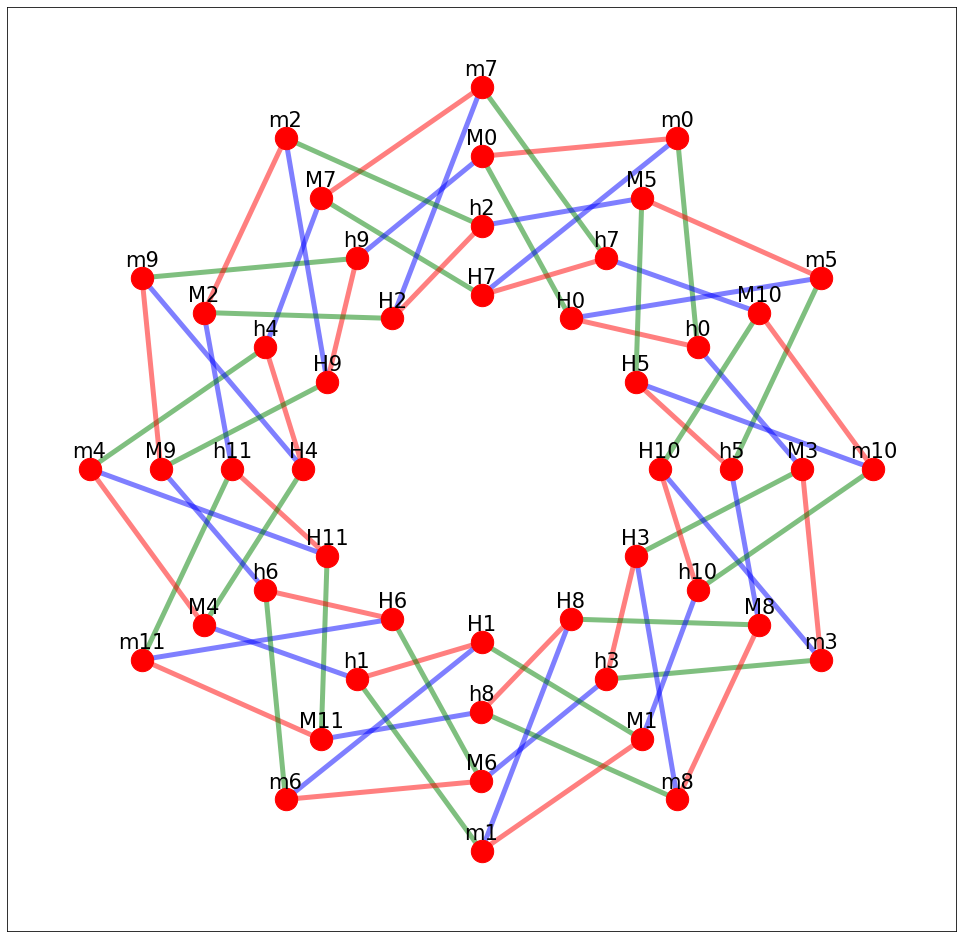

In [6]:
pos = layout(G)
generator_colors = {op: c for op, c in zip(generators, ['r', 'g', 'b'])}
edge_colors = [generator_colors[data[2]['edge_label']] for data in G.edges.data()]
nx.draw_networkx_nodes(
    G,
    pos,
    node_color="r",
    node_size=
    500
)
node_names = {
    (1, 1): 'M',
    (0, 1): 'm',
    (1, 0): 'H',
    (0, 0): 'h',
}
node_labels = {node: f'{node_names[(node.a, node.b)]}{node.c}' for node in G.nodes}
nx.draw_networkx_labels(G, {key: (val[0], val[1]+0.5) for key, val in pos.items()}, node_labels, font_size=21)
nx.draw_networkx_edges(
    G,
    pos,
    width=5,
    alpha=0.5,
    edge_color=edge_colors,
)
plt.show()